# Business Case :- 
Based on given features we need to find which employees are likely to be non-performing of INX Future Inc.

__Preface__

INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry.

 __Domain Analysis__

Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points. CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing employees as this would affect the employee morale of all the employees in general and may further reduce the performance. Also, the market perception best employer and thereby attracting best talents to join the company. Mr. Brain decided to initiate a data science project , which analyses the current employee data and find the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects the findings of this project will help him to take right course of actions. He also expects a clear indicators of non performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals

In [1]:
# Import Required Libraries

import numpy as np                        # For numerical calculation
import pandas as pd                       # For data reading and manipulating
import matplotlib.pyplot as plt           # for visualising data
import seaborn as sns                     # for visualizing 
%matplotlib inline

In [2]:
# for ignoring warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data using pandas 

data = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


## About Each features :--
- **EmpNumber** shows uniqe ID number of each Employee and it is not required for modeling and analysing.
- **Age** shows how much the employee is older.
- **Gender** is the sex of employee (Male , Female , Transgender).
- **EducationBackground** is the specialization of employees in which they studied.
- **MaritalStatus** shows that the employee is married or not (Married, Unmarried , Single).
- **EmpDepartment** is the department of employee in which they working.
- **EmpJobRole** shows the position of employee.
- **BusinessTravelFrequency** means how many times the employee travels for the field or near to clients.
- **DistanceFromHome** is how far the employee stays from the company.
- **EmpEducationLevel** is the highest qualification of employee.
- **EmpEnvironmentSatisfaction** is a rating about the work calture or Environment in which they works.
- **EmpHourlyRate** shows how much time employee works in a day.
- **EmpJobInvolvement** is the  employee's emotional investment in their work.
- **EmpJobLevel** is the employee's position within the organization.
- **EmpJobSatisfaction** is level of job satisfaction that employees experience in their current roles.
- **NumCompaniesWorked** shows that how many companies the employee worked before.
- **OverTime** indicating whether an employee works beyond their regular hours.
- **EmpLastSalaryHikePercent**  percentage increase in an employee's salary during their most recent salary hike.
- **EmpRelationshipSatisfaction** shows that the relationships with colleagues, supervisors, and team members.
- **TotalWorkExperienceInYears** is the number of years of work experience that an employee has accumulated throughout their career.
- **TrainingTimesLastYear** is the number of times an employee received training in the last year.
- **EmpWorkLifeBalance**shows that how well an employee can manage their professional and personal commitments.
- **ExperienceYearsAtThisCompany** indicates the number of years an employee has worked at their current company.
- **ExperienceYearsInCurrentRole** represent the number of years an employee has spent in their current job role or position within the organization.
- **YearsSinceLastPromotion** indicates the number of years that have elapsed since an employee's last promotion within the organization.
- **YearsWithCurrManager** shows that the number of years an employee has worked under their current manager.
- **Attrition** used to determine whether an employee has left the organization or is still employed
- **PerformanceRating** represent an employee's performance rating within the organization and it is our Target Class.based on it we predict about employee.

# Basic Checks :-

In [4]:
# All columns are not visible , by using "pd.set_option('display.max_columns',None)" comand display columns
pd.set_option('display.max_columns',None)

In [5]:
# to see top five records
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [6]:
# to know about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

**Insights From data.info()  :**
 - The INX dataset contains 1200 entries, numbered from 0 to 1199. 
 - There are total of 28 columns in the dataset, with 19 columns having the "int64" data type, and 9 columns having the "object" data type.
- The columns do not have null values.

In [7]:
# statistical analysis of numerical columns  of the data set.

data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## Insights from " data.describe() " : 

- **Age** Average age of the employees is 36.9 with a range from 18 years to 60 years.
- **DistanceFromHome** Average distance from home to the workplace is about 9.17 km with a range from 1 km to 29 km.

- **EmpHourlyRate** Average hourly rate is around 65.98K, with a range from 30K to 100K.
- **NumCompaniesWorked** 75% employees worked on 4 companies.
- **EmpLastSalaryHikePercent** Average last salary hike percentage is approximately 15.22% with a maximum hike of 25%.
- **TotalWorkExperienceInYears** 75% of employees having 15 year of experience with maximum of 40 year work experience.
- **TrainingTimesLastYear** 75% Employees had 3 training times last year.
- **ExperienceYearsAtThisCompany** Average years in the current role is approximately 4.29 years.
- **ExperienceYearsInCurrentRole** Employees having average 3.6 years of experiance in current role.
- **YearsSinceLastPromotion** 75% employees are not promoted from past 3 years.
- **YearsWithCurrManager** 75% employees are working with the current manager since 7 years.

In [8]:
# statistical analysis of objective columns  of the data set.

data.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


## Insights from " data.describe(include="O") " :

- Dataset having two genders with 725 Males and remaining Females.
- Employees have 6 types of educational background in which Life Science is most occured.
- MaritalStatus has 3 types but 548 employees married.
- Six types of Employee Departments but Sales has highest counts.
- 270 employees are working as Sales Executive but 19 different types of Job role are there.
- Business travel frequency is categorized into three levels, with "Travel_Rarely" being the most common (846 occurrences).
- Most employees do not work overtime.
- The majority of employees in the dataset do not have attrition records, with "No" being the most frequent value (1022 occurrences).

In [9]:
# so here we drop the EmpNumber , because it's a unique serial number.
data.drop('EmpNumber',axis=1,inplace=True)

# Exploratory Data Analysis : 

In [10]:
# separate Contineous data and categorical data
num_data = data[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent',
               'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

cat_data = data.drop(num_data,axis=1)

## ( i ) . Univariate Data Analysis - 

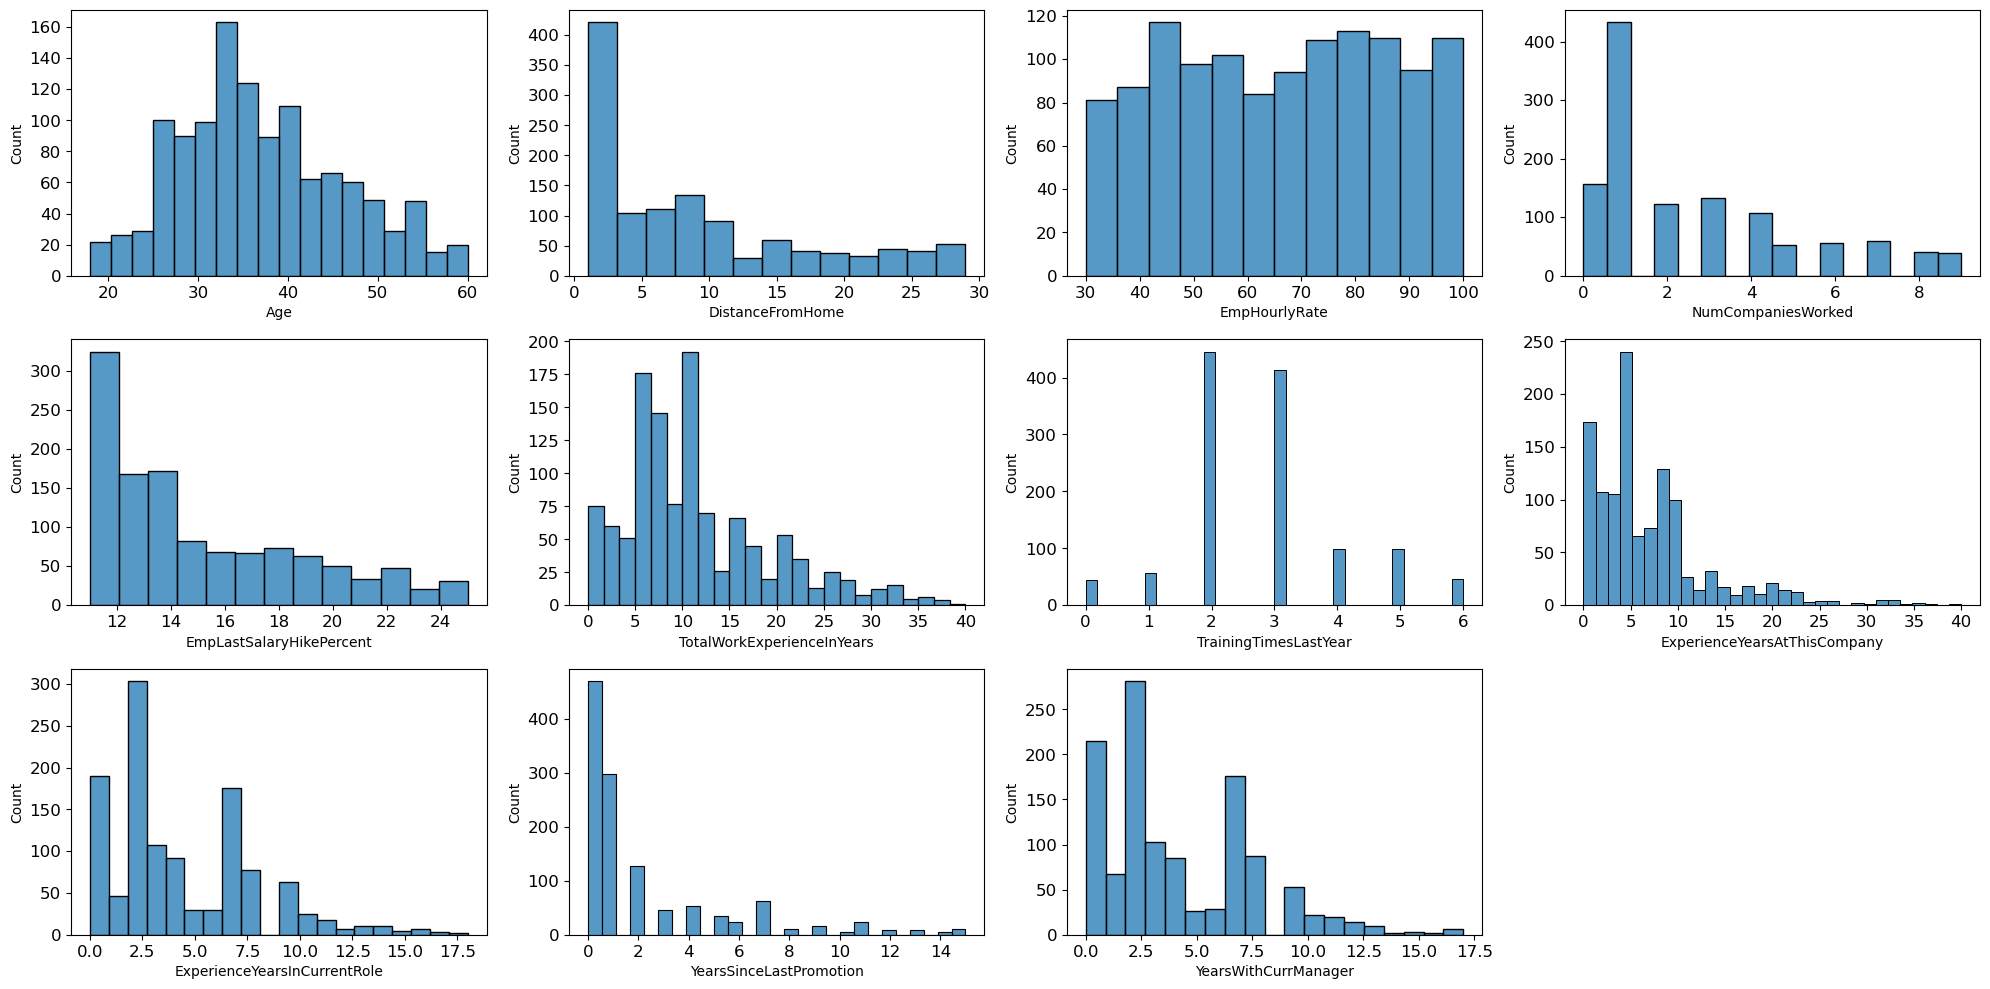

In [11]:
# Univariate Analysis for Numerical Data

plt.figure(figsize=(20,10))                # Set Canvas size
plotnumber = 1
for i in num_data.columns :            # iterate over all columns 
    plt.subplot(3,4,plotnumber)           # set number of plots in row and columns
    sns.histplot(x = data[i])             # visualise through histogram
    plt.xticks(fontsize=12)               # set X ticks with size
    plt.yticks(fontsize=12)               # set y ticks with size
    plotnumber = plotnumber + 1
plt.tight_layout()                        # to avoid overlapping of images

## Insights from Numerical Univariate Analysis : 

- The majority of employees working at INX are in the age group of 25 to 40.
- Approximately 35% of employees reside within a 3 km range from the office,while 30% of employees live more than 10 km away from the office.
- All employees charging between 80 - 120 per hour.
- 13% employee are not worked for any company i.e they are freshers and 36% employee worked for only 1 company , so they are also freshers.
- 61% employee having only 11 - 15 % of salary hike from last salary.
- 70% employee get trained for 2 or 3 times in last year.
- 35% employee having upto 5 year of experience while 40% having 10 - 15 year of experience.
- only 10 % employees having more than 20 years of experiance, so they are loyal to the company and working hard.
- only 60% employees having upto 5 year of working experience in Current role.
- only 5% employee are not promoted from more than 10 years but upto 80% employee promoted within 2 years.
- 40% employee worked from last 2 year under the current manager.

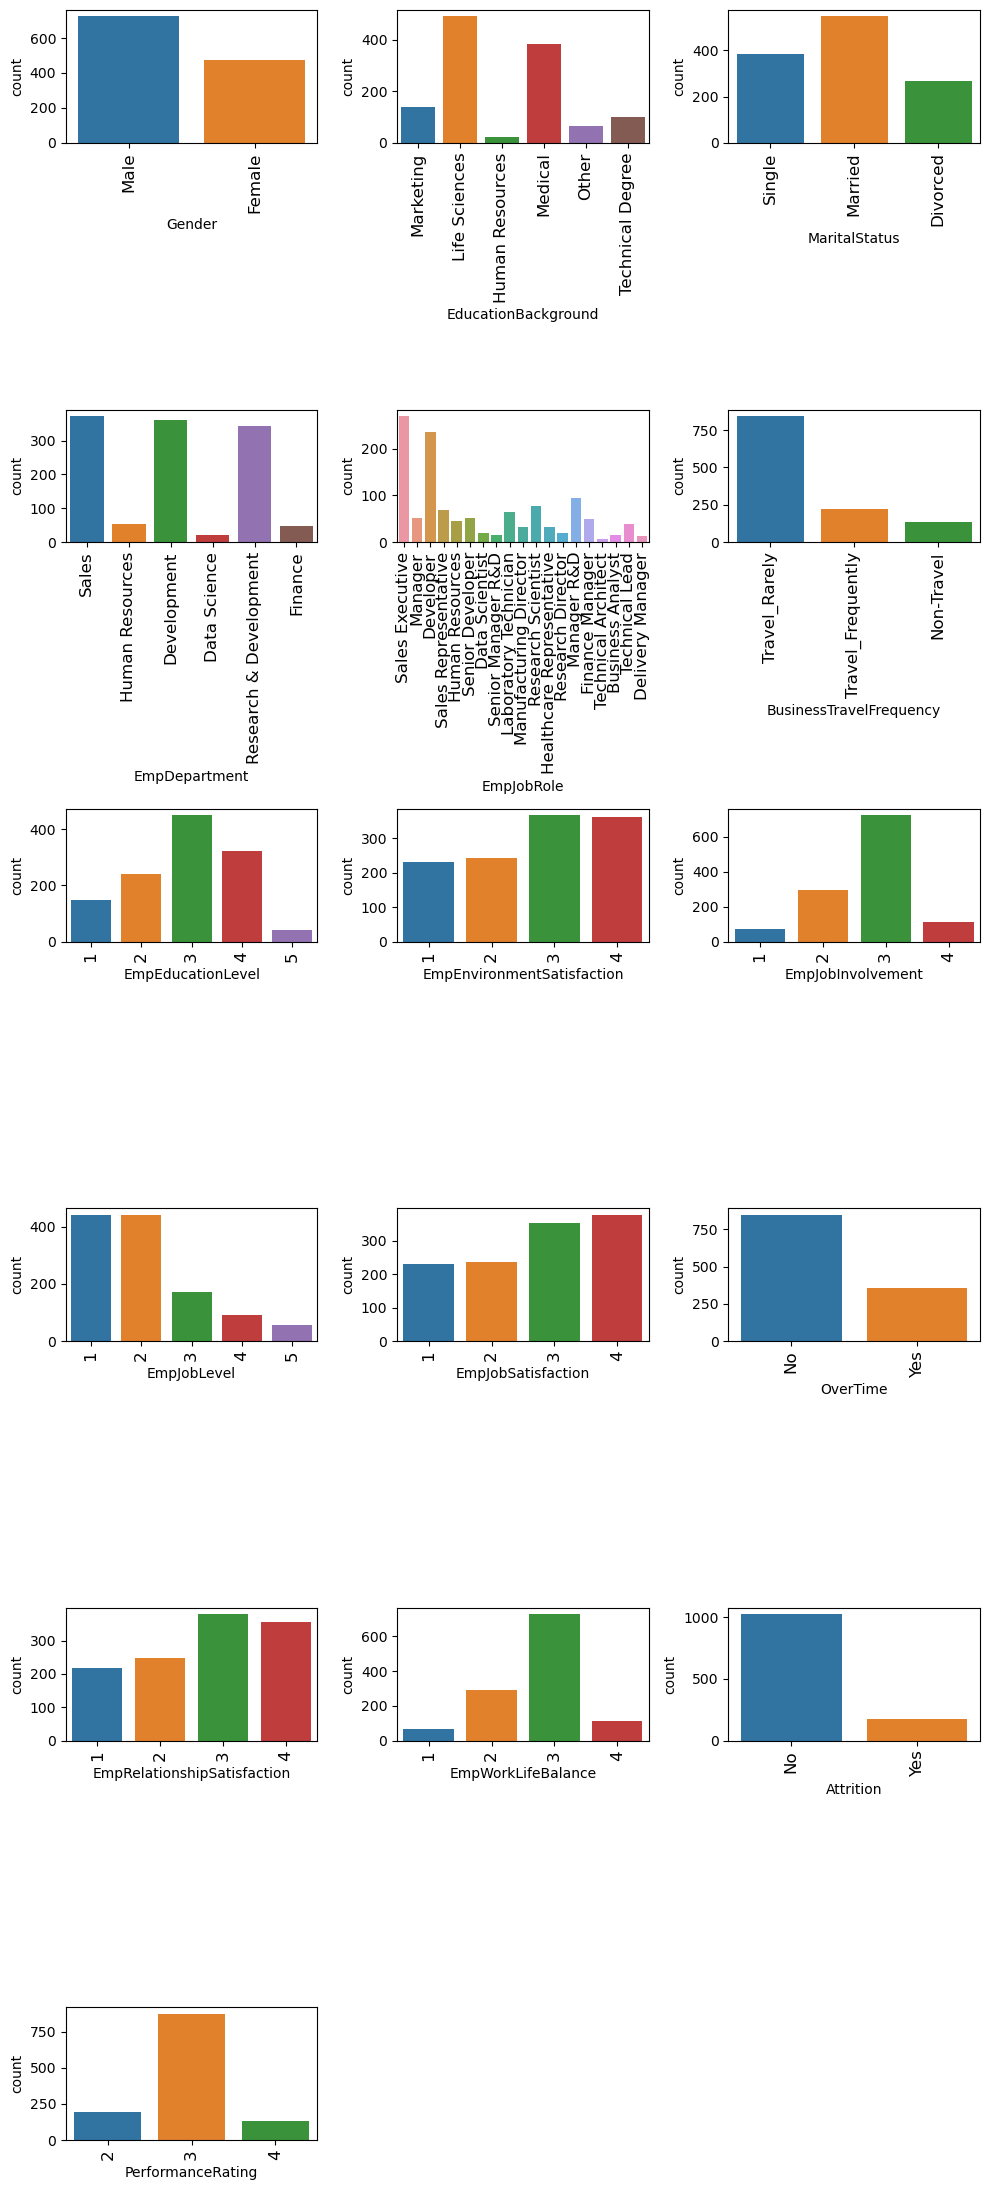

In [12]:
# Univariate Analysis for Categorical Data

plt.figure(figsize=(10,22))                                     # Set canvas size
plotnumber = 1
for i in cat_data.columns :                                     # iterate over categorical data
    plt.subplot(6,3,plotnumber)                                 # set plots in a row & column
    sns.countplot(x = data[i])                                  # plot count plot
    plt.xticks(rotation = 90,fontsize=12)                       # set x_ticks size with rotation
    plotnumber = plotnumber + 1 
plt.tight_layout()                                              # avoid overlapping

## Insights from categorical univariate Analysis :

- In Gender there are 60% male & 40% female Employees.
- 41% employees having Life Science background, followed by medical background which is 32%.
- 46% employee are merried , 32% single and 22% employee are divorsed.
- 31% employee in sales , 30% in Developement , 29% in research department.
- 22% employee works in Sales executive and 20% in developement role.
- 70% employee travels rarely and 18% travels frequently but 12 % are not travelled.
- 37% employee have lavel 3 , 27% have lavel 4 educational level.
- more than 60% employee having good environment Satisfaction rating of 3 or 4 out of 5 star.
- 60 % employee moderately involved in their job while only 9 % highly involved.
- Approximately 75% employee having 1 or 2 job level.
- 40% employee have not satisfied in their job while 60% employee satisfied.
- only 30% employee prefered for over time, remaining are not.
- 40% employee have not satisfied relationship with their collegue or senior.
- only 10% employee managed well their work life while 30% employee are not and 60% employee moderately balanced their work life.
- 85% employee are not dragged in job 15% are dragged or having attrition in job.
- only 11% employee performs well in their work and 73% are moderate but 16% employee are not performed well.

## ( ii ) . Bi - Variate Analysis :

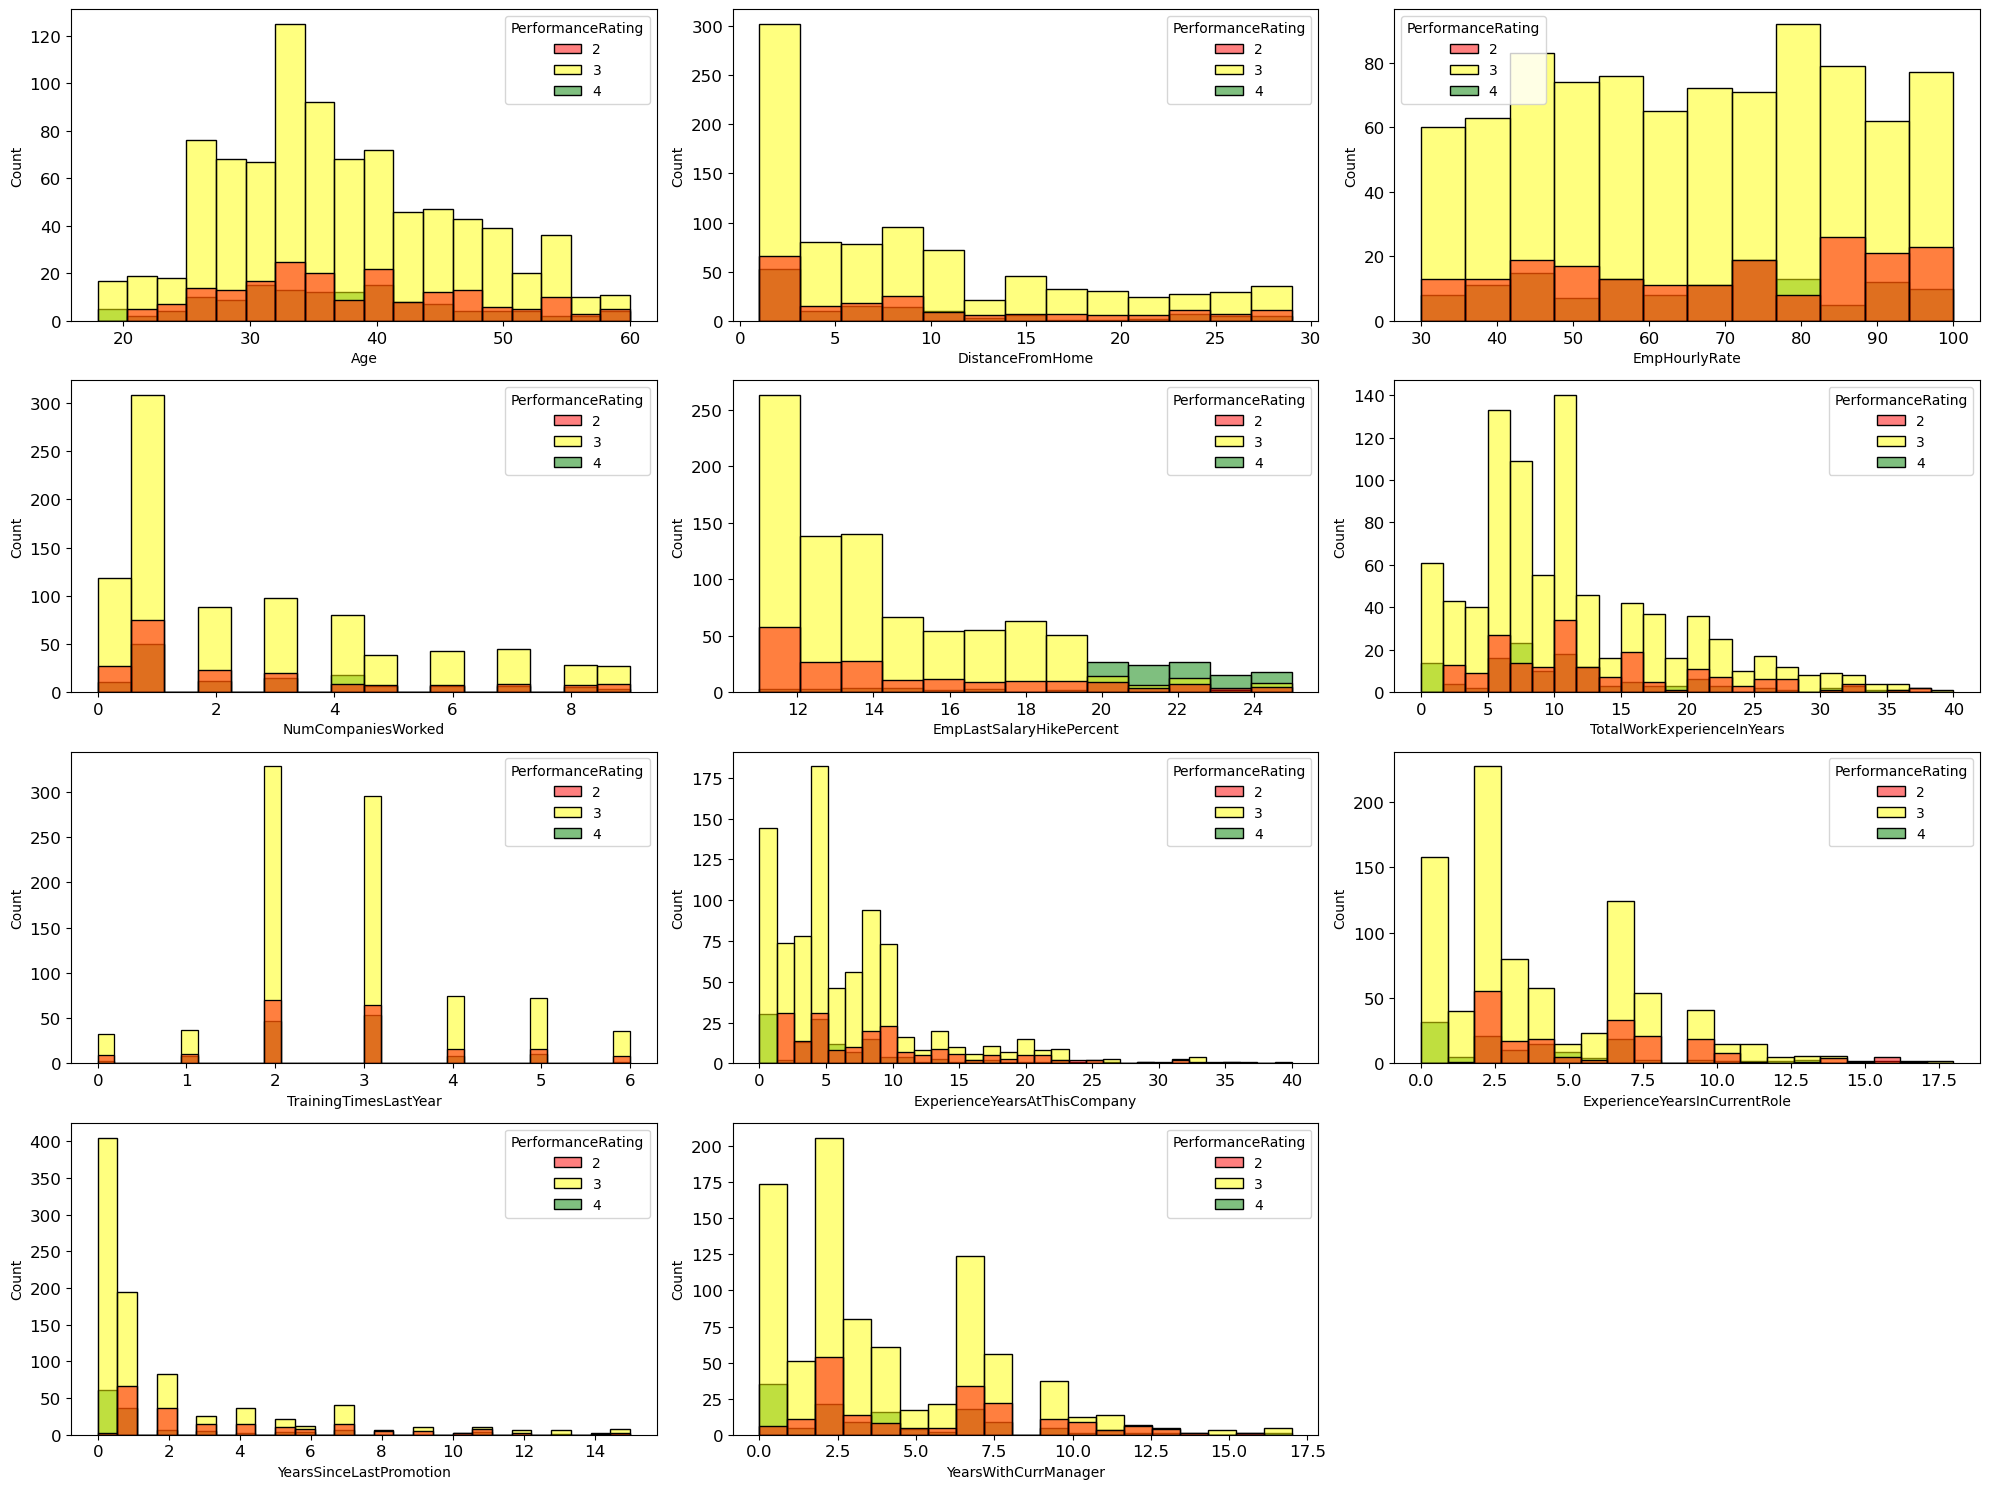

In [13]:
# Bi - Variate Analysis for Numerical Data

plt.figure(figsize=(20,15))         # set canvas size
plotnumber = 1                      # set plot number as 1
for i in num_data.columns :         # iterate through num_data
    plt.subplot(4,3,plotnumber)     # set no. of rows & columns
    sns.histplot(x = data[i],hue = data.PerformanceRating,palette=["red","yellow","green"])
    plt.xticks(fontsize=12)         # xticks sizze
    plt.yticks(fontsize=12)         # yticks size
    plotnumber = plotnumber + 1     # set to iterate all plots
plt.tight_layout()                  # avoid from overlapping

## Insights From Bivariate Analysis of Numerical Data :

- Employee whose age between 25 - 45 their performance seems to bad.
- whose distance of office from home is less then 10 km , their performance is Bad.
- whose Hourly rate is more than 85 , their performance is also bad.
- who worked for only one company their performance seems bad.
- whose salary hike is below 14% their performance is too low but whose hike is grater than 20 , their performance is very good.
- whose experience is between 5 - 15 years , their performance seems bad.
- whose training time is 2 or 3 times , their performance is bad.
- who are fresher or worked for 10 year in this company , their performance is bad.
- who worked for 2 year in same role , his performance is bad.
- employee who promoted with in 4 year , his performance is bad.
- employee who worked 2 year or more than 6.5 year under the current manager his performance is also bad.

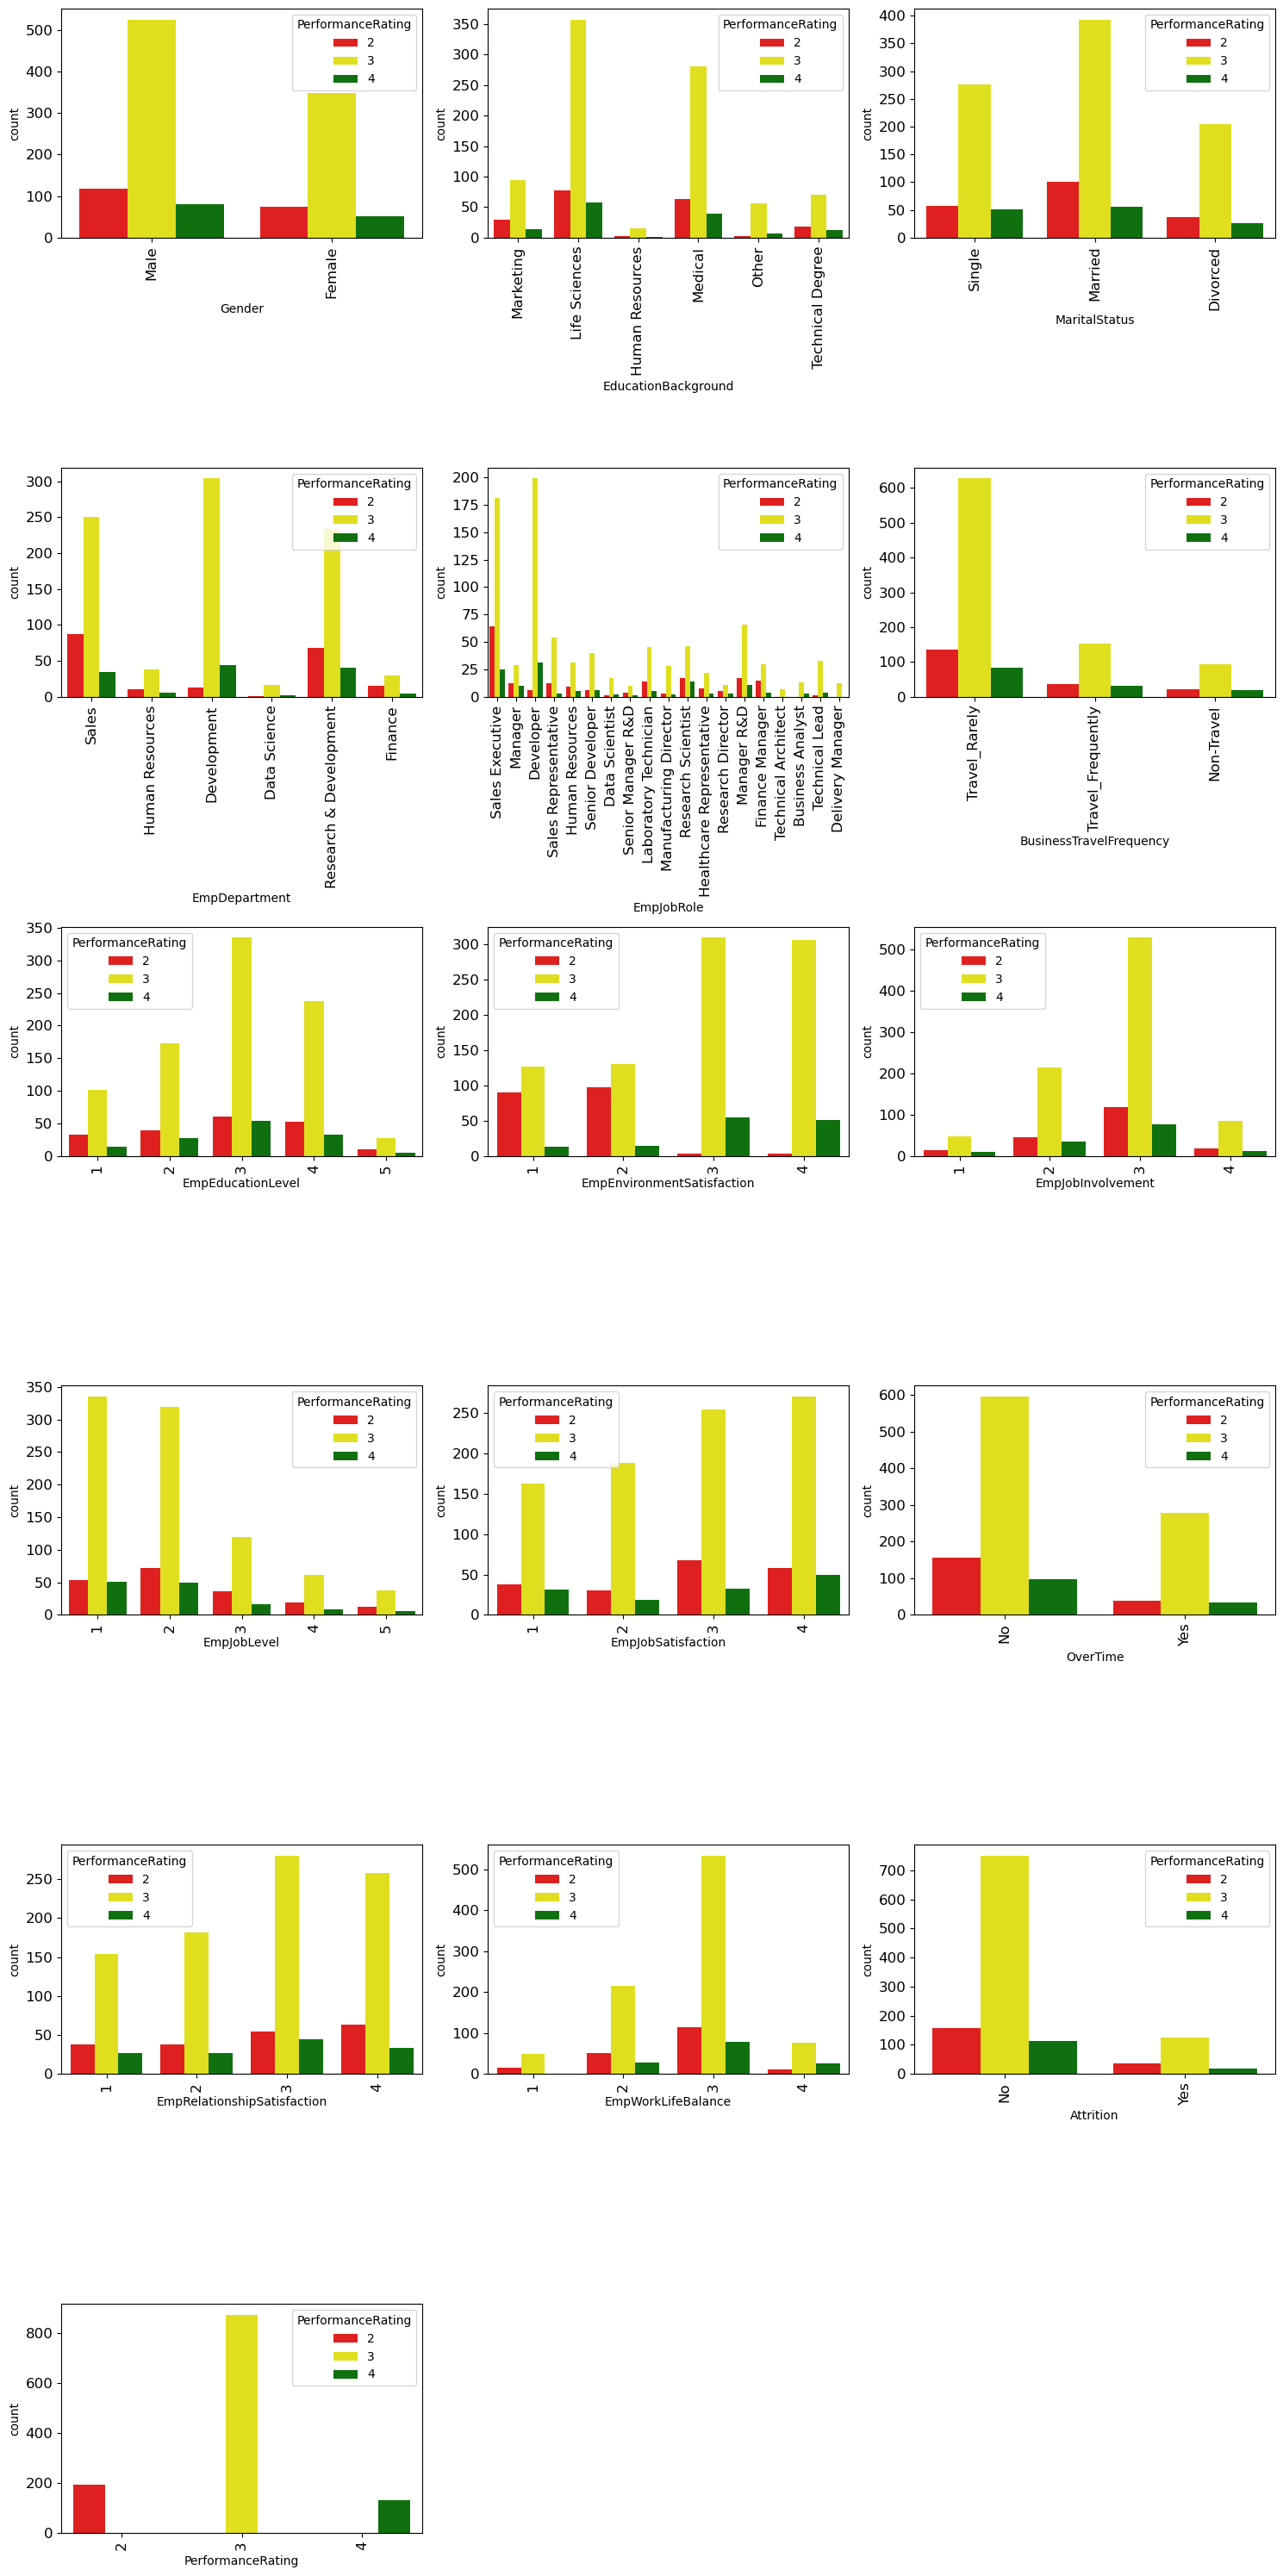

In [14]:
# Bi - Variate Analysis for Numerical Data

plt.figure(figsize=(15,30))                       # set canvas size
plotnumber = 1
for i in cat_data.columns :                       # iterate all categorical columns
    plt.subplot(6,3,plotnumber)                   # set rows and columns
    sns.countplot(x = data[i],hue = data.PerformanceRating,palette=["red","yellow","green"])
    plt.xticks(rotation = 90,fontsize=12)         # xticks size
    plt.yticks(fontsize=12)                       # yticks size
    plotnumber = plotnumber + 1
plt.tight_layout()                                # to avoid form overlapping

## Insights from Bivariate Analysis of Categorical Data :

- The Male and female are almost same in their performance.
- A majority of employees in the fields of Life Science, Medicine, and Marketing seem to have poor performance.
- married employees performance is bad.
- Employees in Sales and Research & Development departments seem to have poor performance.
- Sales Execuitive Employees performance is bad.
- Rarely travelling employee performance is poor.
- Employee whose eduaction level are 3 and 4 their performance seems to bad.
- who are not satisfied in job environment , their performance seems too bad.
- whose job involvment is low or high , their performance is bad.
- Employee whose job level on 5 their performance seems to bad.
- whose relationship satisfaction rate is low , their performance is also low.
- whose work life is not balanced , their performance seems to low.
- who have attrition in their work life, their performance seems to bad.

# Data Preprocessing : -

### ( i ) . Handle Missing Values :

In [15]:
# to see all missing values present in dataset
data.isnull().sum()

### No missing values are present in data set.

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### ( ii ) . Handle Outlier

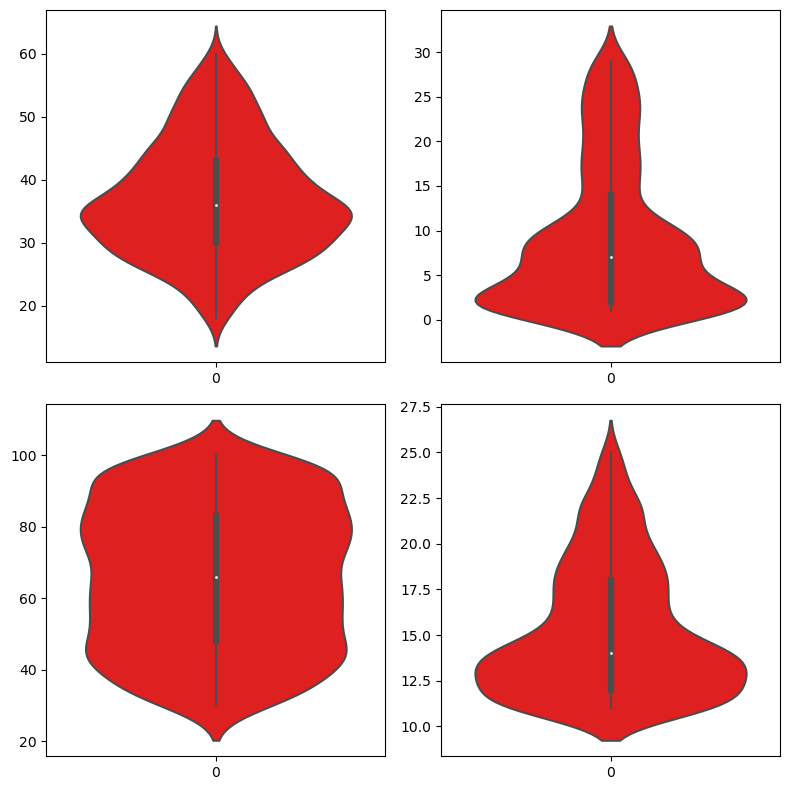

In [16]:
# outlier checking for contineous variable
plt.figure(figsize=(8,8))                
plotnumber = 1
for i in ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent'] :
    plt.subplot(2,2,plotnumber)
    sns.violinplot(data[i],color='r')
    plotnumber = plotnumber + 1
plt.tight_layout()

### ( iii ) . Handle Cateorical Data 

In [17]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


                                                   ___Gender___

In [18]:
# count values for Gender
data['Gender'].value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [19]:
# Change Gender columns from categorical to numerical using map function

data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

                                          ___EducationBackground___

In [20]:
# Value counts for Educational Background
data['EducationBackground'].value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [21]:
# Change EducationBackground columns from categorical to numerical manually using map function

data['EducationBackground'] = data['EducationBackground'].map({"Human Resources":0 , "Other":1 ,"Technical Degree":2 ,
                                 "Marketing":3 , "Medical":4 ,"Life Sciences":5})

                                         ___MaritalStatus___

In [22]:
# Value counts for MaritalStatus
data['MaritalStatus'].value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [23]:
# Change MaritalStatus columns from categorical to numerical  using replace function

data["MaritalStatus"].replace({"Divorced":0 , "Single":1 , "Married":2},inplace=True)

                                              ___EmpDepartment___

In [24]:
# Value counts for EmpDepartment
data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [25]:
# Change EmpDepartment columns from categorical to numerical  using replace function

data['EmpDepartment'].replace({"Data Science":0 , "Finance":1 , "Human Resources":2 , "Research & Development":3 , 
                               "Development":4 , "Sales":5},inplace=True)

                                         ___EmpJobRole___

In [26]:
# Value counts for EmpJobRole
data['EmpJobRole'].value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [27]:
# we have nineteen unique values for that we use label encoding

from sklearn.preprocessing import LabelEncoder         # import label Encoding from sklearn's preprocessing module
Label_Encoder = LabelEncoder()                         # create a object of Label Encoder

In [28]:
# Apply Label encoding on Emp Job Role
data['EmpJobRole'] = Label_Encoder.fit_transform(data['EmpJobRole'])

                                         ___BusinessTravelFrequency___

In [29]:
# Value counts for BusinessTravelFrequency
data['BusinessTravelFrequency'].value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [30]:
# changedata BusinessTravelFrequency categorical data to numerical using map function

data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].map({"Non-Travel":0 , "Travel_Frequently":1 , 
                                                                       "Travel_Rarely":2})

                                              ___OverTime___

In [31]:
# Value counts for OverTime
data['OverTime'].value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [32]:
# changedata OverTime categorical data to numerical using Replace function

data['OverTime'].replace({"No":0 , "Yes":1},inplace=True)

                                               ___Attrition___

In [33]:
# Value counts for Attrition
data['Attrition'].value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [34]:
# changedata Attrition categorical data to numerical using Replace function

data['Attrition'].replace({"No":0 , "Yes":1},inplace=True)

                                                  ___PerformanceRating___

In [35]:
# Value Counts for PerformanceRating
data['PerformanceRating'].value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [36]:
# This is  a multiclass classification , so for better accuracy we convert output into 0 , 1 & 2.

data['PerformanceRating'].replace({2:0 , 3:1 , 4:2},inplace=True)

# Feature Selection :

In [37]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,1,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,1
1,47,1,3,1,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,1
2,40,1,5,2,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,2
3,41,1,0,0,2,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,1
4,60,1,3,1,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,1


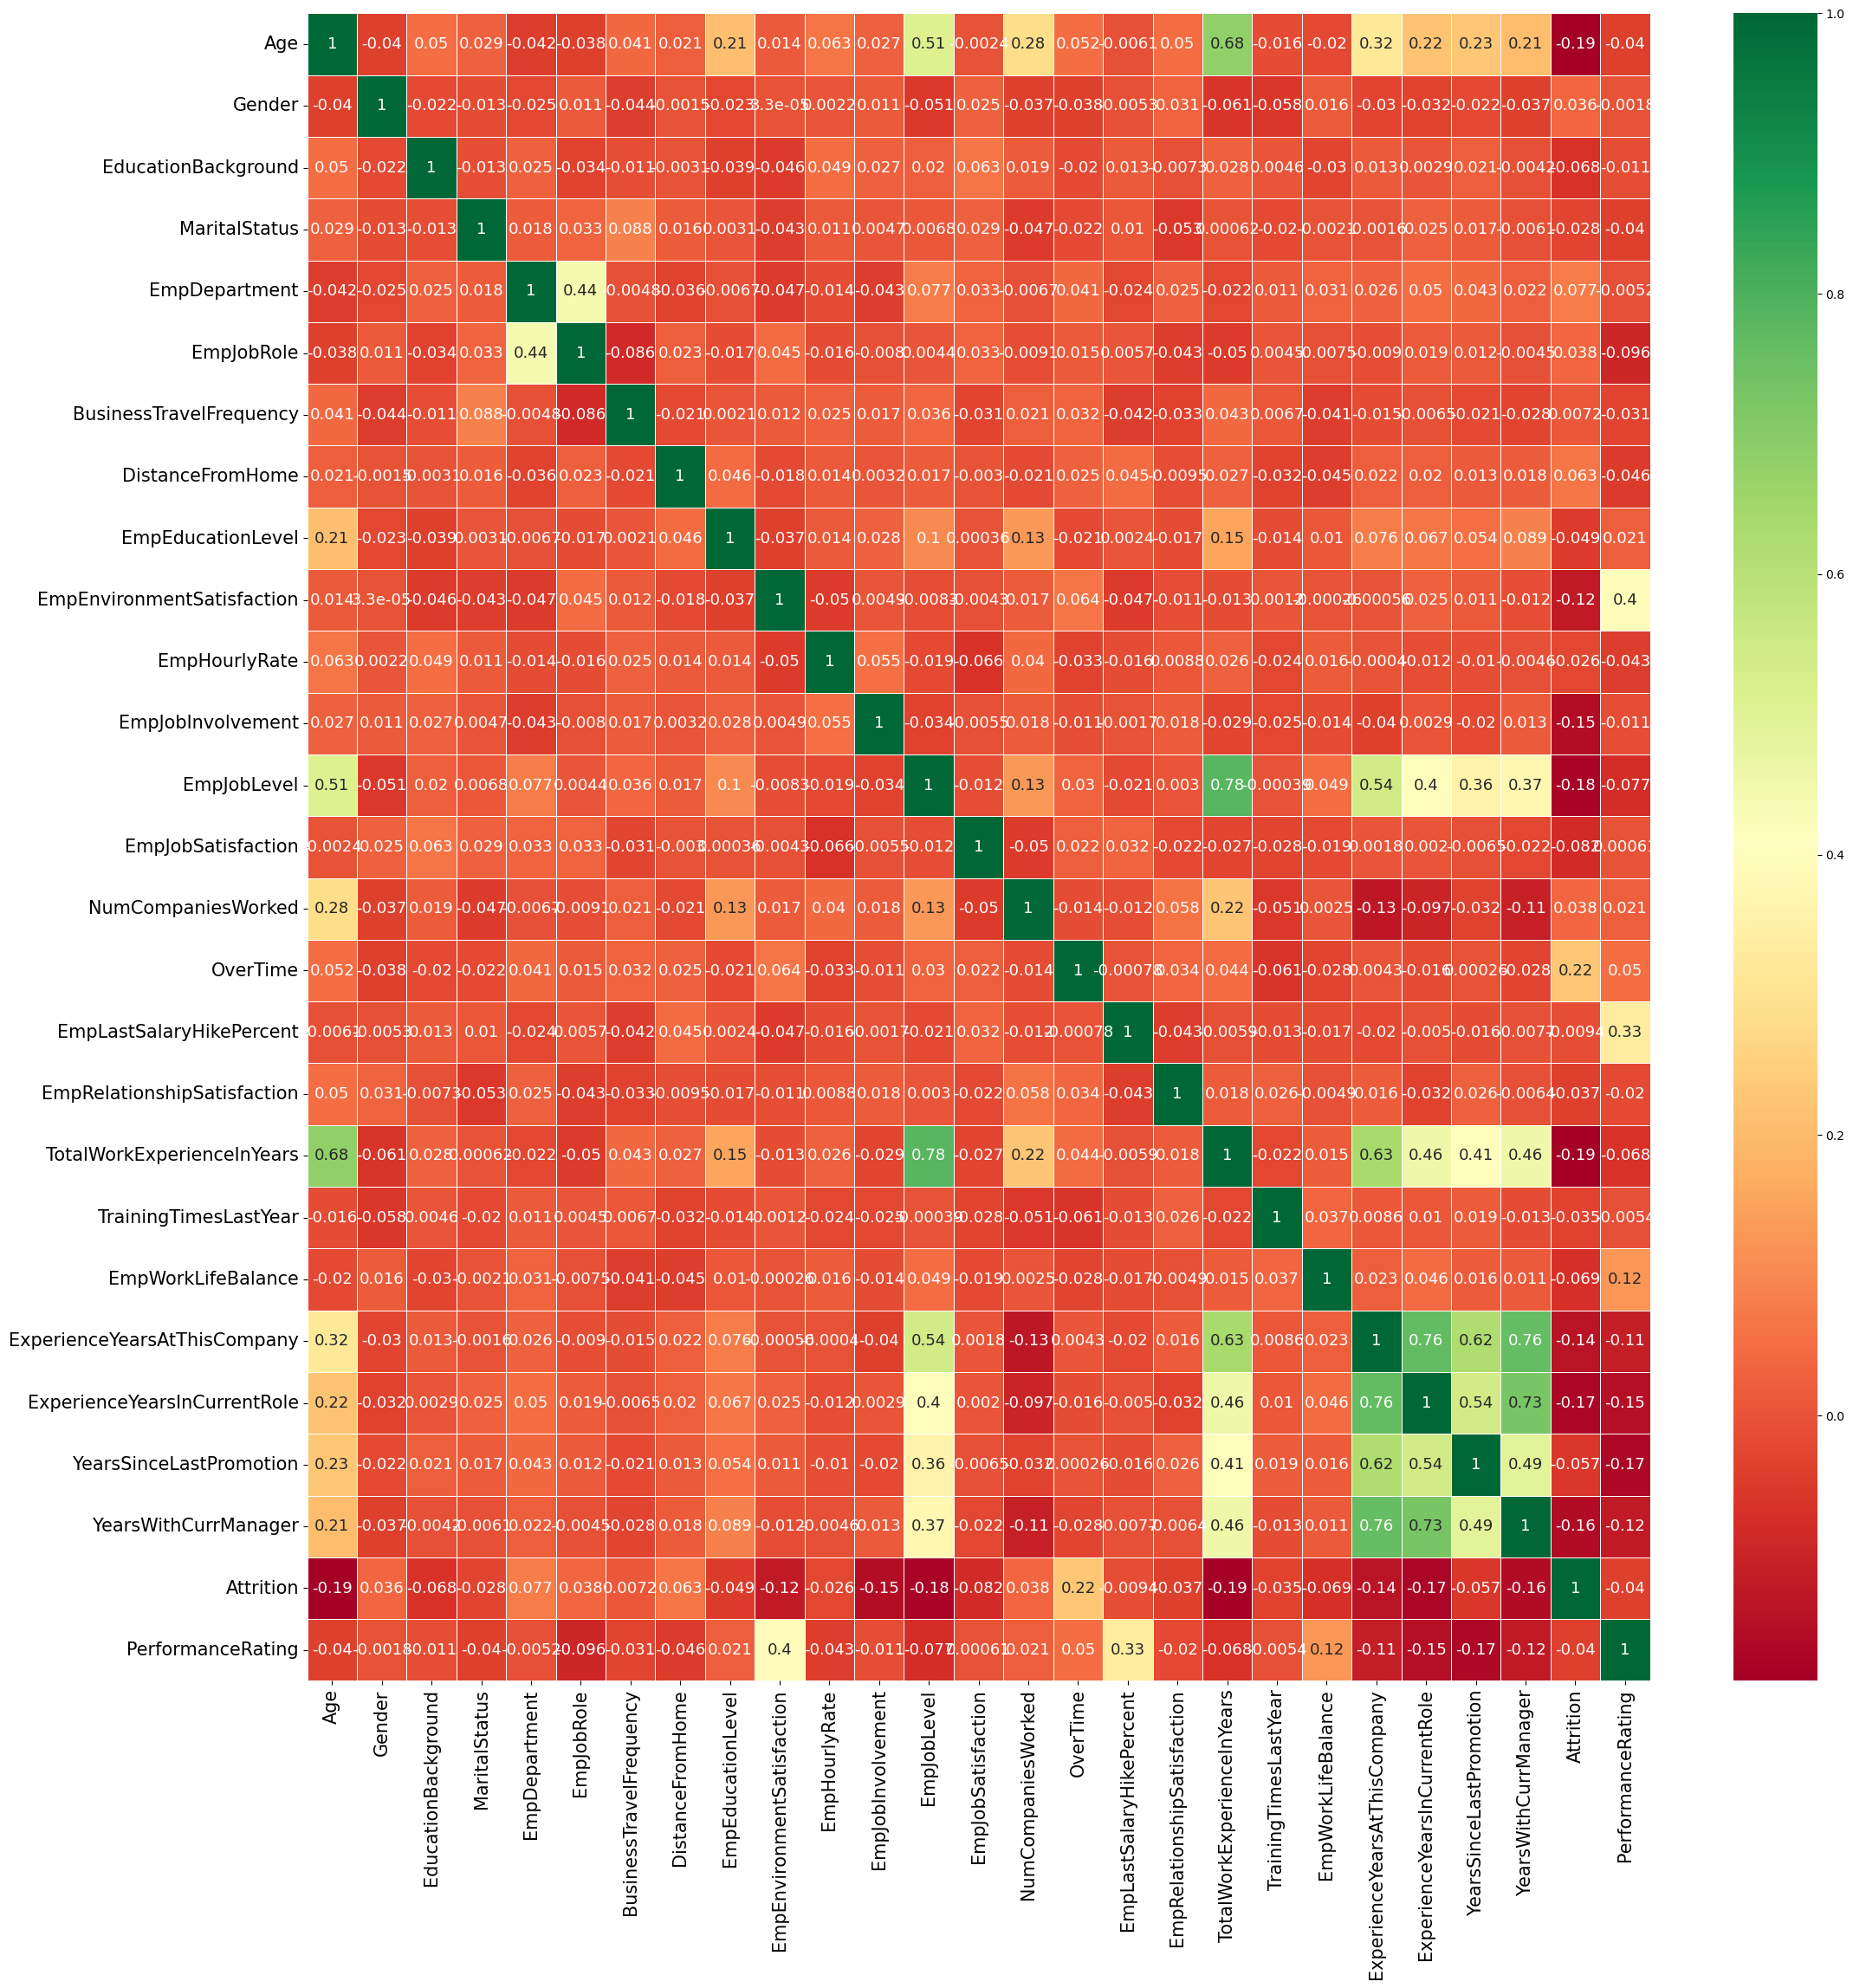

In [38]:
# use heat map to check correlation of each features with each others
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.65,annot_kws={"size": 13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Insights From Heatmap :

- independent features are Not correlated with each other.
- And some independent features have no correlation with target class , so we will drop them.
-  **( Gender , EmpDepartment , EmpJobSatisfaction , TrainingTimesLastYear )** these columns have no corelation or little corelation with target variable.

- **EmpEnvironmentSatisfaction , EmpLastSalaryHikePercent & EmpWorkLifeBalance** are the **Top three** features that highily affect the Employees Performance Rating.

# Model Creation

In [39]:
# Create Dependent and Independent variable

X = data.drop(['Gender' , 'EmpDepartment' , 'EmpJobSatisfaction' , 'TrainingTimesLastYear' , 'PerformanceRating'],axis=1)
y = data['PerformanceRating']

In [40]:
X.head()

,Age,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,3,1,13,2,10,3,4,55,3,2,1,0,12,4,10,2,10,7,0,8,0
1,47,3,1,13,2,14,4,4,42,3,2,2,0,12,4,20,3,7,7,1,7,0
2,40,5,2,13,1,5,4,4,48,2,3,5,1,21,3,20,3,18,13,1,12,0
3,41,0,0,8,2,10,4,2,73,2,5,3,0,15,2,23,2,21,6,12,6,0
4,60,3,1,13,2,16,4,1,84,3,2,8,0,14,4,10,3,2,2,2,2,0


In [41]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: PerformanceRating, dtype: int64

## Data Balancing :

- Data Balancing is the process of adjusting the class distribution in a dataset such that each class has a relatively equal number of Samples.
- when dealing with imbalanced datasets, where one class's rarity can lead to biased model predictions and it reduce the models overal performance for that we use SMOTE techinique.
- " SMOTE " Generating synthetic examples for the minority class based on the existing data.

In [42]:
# Value Counts for PerformanceRating
data['PerformanceRating'].value_counts()

### The target class are not equally distributed.

1    874
0    194
2    132
Name: PerformanceRating, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE           # Import Smote from imblearn.over_sampling
smote = SMOTE()                                    # Create a variable of smote

# apply SMOTE on target variable
X_smote , y_smote = smote.fit_resample(X,y)

In [44]:
# importing counter to check count of each label
from collections import Counter 
print("Class Before SMOTE : ",Counter(y))                       # checking count for each class 
print("Class After SMOTE : ",Counter(y_smote))                  # checking count for each class 

Class Before SMOTE :  Counter({1: 874, 0: 194, 2: 132})
Class After SMOTE :  Counter({1: 874, 2: 874, 0: 874})


In [45]:
# Split Data into Train and Test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=10)

# Model Selection : - 

## ( i ) . Logistic Regression.....

In [46]:
from sklearn.linear_model import LogisticRegression          # import logistic regression
log_reg = LogisticRegression(multi_class='ovr',random_state=1)              # create object for multiclass

log_reg.fit(X_train,y_train)                                 # train logistic regression with data
y_log_pred = log_reg.predict(X_test)                         # make prediction using x_test

In [47]:
# print predicted values
y_log_pred

array([0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0,
       1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 2,
       0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0,
       1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1,
       1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2,
       0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2,
       2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2,

In [48]:
# print original values
y_test.values

array([0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0,
       1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2,
       0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1,
       1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2,

In [49]:
# model evaluation 
from sklearn.metrics import accuracy_score , f1_score , confusion_matrix ,classification_report , precision_score , recall_score

In [50]:
# print Confusion matrics
confusion_matrix(y_test,y_log_pred)

array([[195,  12,   6],
       [ 27, 168,  22],
       [ 14,  16, 196]], dtype=int64)

In [51]:
# test model performance
acc_log = accuracy_score(y_test,y_log_pred)
print("Accuracy of Logistic regression : ",acc_log)

Accuracy of Logistic regression :  0.8521341463414634


In [52]:
# test model performance
f1_log = f1_score(y_test,y_log_pred,average='weighted')
print("f1_score of Logistic regression : ",f1_log)

f1_score of Logistic regression :  0.8512570424541588


In [53]:
# print Classification report
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       213
           1       0.86      0.77      0.81       217
           2       0.88      0.87      0.87       226

    accuracy                           0.85       656
   macro avg       0.85      0.85      0.85       656
weighted avg       0.85      0.85      0.85       656



                               ________Hyperparameter Tunning of Logistic Regression ________

- **Hyperparameter Tunning** is the process of finding the best set of hyperparameters for a machine learning model to achieve optimal performance on a given dataset.
- In hyperparameter tunning the model perform and calculate accuracy with all possible parameter given to it internally and give the best parameters which give the best performance.
- **Grid Search** and **Random Search** are two commonly used methods for Hyperparameter tunning.

In [54]:
# import GridSearchCV or RandomizedSearchCV to iterate through all parameters and make a model with all combination

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [55]:
# creating dictionary --> key value pair of hyperparameters having key as parameter and values as its values
Log_Hyperpara = {
    'C': [0.001, 0.01, 0.1, 1, 10, 1000],                 # Regularization strength values
    'solver': ['lbfgs', 'liblinear', 'saga'],             # Solver options
    'max_iter':[100,200,400,600,800,1000],                # maximum iteration
    'multi_class':['ovr','multinomial']                   # how to perform multiclass classification 
}

# training data on gridsearch cv for finding best parameters
Log_grid = GridSearchCV(LogisticRegression(random_state=0),         # Estimator
                       param_grid=Log_Hyperpara,      # param_grid----> hyperparametes(dictionary we created)
                       scoring='accuracy',            # scoring---> performance matrix to check performance
                       cv=3,                          # cv------> number of flods
                       verbose=3,                     # verbose=Controls the verbosity: the higher, the more messages.
                       n_jobs=-1                      # Number of jobs to run in parallel,-1 means using all processors.
                       )

# training data on gridsearch cv for finding best parameters
Log_grid.fit(X_train,y_train)

print(f"Best Score: {Log_grid.best_score_})")         # printing  best score
print(f"Best paramters: {Log_grid.best_params_})")    # printing  best parameters

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Score: 0.832143300440638)
Best paramters: {'C': 1, 'max_iter': 400, 'multi_class': 'ovr', 'solver': 'lbfgs'})


In [56]:
# Train the final model with the best hyperparameters on the full training data
log_reg_hyp = LogisticRegression(C= 0.1, max_iter =  500, multi_class = 'multinomial', solver = 'lbfgs')
log_reg_hyp.fit(X_train, y_train)

# Evaluate the final model on the test data
y_hyp_log = log_reg_hyp.predict(X_test)
acc_hyp_log = accuracy_score(y_test, y_hyp_log)
print("Accuracy of Logistic regression : ",acc_hyp_log)

Accuracy of Logistic regression :  0.8551829268292683


In [57]:
# print classification report
print(classification_report(y_test,y_hyp_log))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       213
           1       0.86      0.77      0.81       217
           2       0.84      0.90      0.87       226

    accuracy                           0.86       656
   macro avg       0.86      0.85      0.85       656
weighted avg       0.86      0.86      0.85       656



## (ii) . K Nearest Neighbour .....

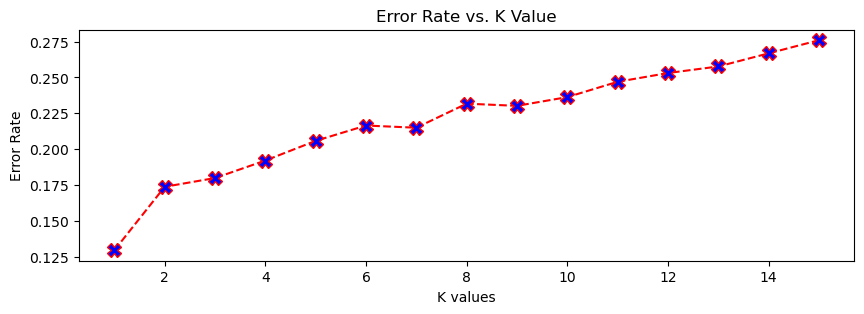

In [58]:
# taking optimal k to determine how many nearest neighbors  required to create model

from sklearn.neighbors import KNeighborsClassifier               # import KNeighborsClassifier
Error_rate = []                                                  # create a list to store erroe for each k value
for K in range(1,16):                                            # use for loop to iterate from 1 to 16.
    model = KNeighborsClassifier(n_neighbors=K)                  # create model
    model.fit(X_train,y_train)                                   # train model
    y_pred = model.predict(X_test)                               # predict X_test
    Error_rate.append(np.mean(y_pred != y_test))                 # append error in empty list
    

# plot a graph between K values and Error Rate
plt.figure(figsize=(10,3))
plt.plot(range(1,16),Error_rate,linestyle='dashed',color='red',marker='X',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.show()

In [59]:
knn = KNeighborsClassifier(n_neighbors=3)                  # define KNN model
knn.fit(X_train,y_train)                                   # train KNN model
y_pr_knn = knn.predict(X_test)                             # make prediction for test data
acc_knn = accuracy_score(y_pr_knn,y_test)                  # check performance
print("Accuracy of K nearest Neighbour : ",acc_knn)

Accuracy of K nearest Neighbour :  0.8201219512195121


In [60]:
# print f1 score
f1_knn = f1_score(y_test,y_pr_knn,average='weighted')
print("f1_score of K neighbour : ",f1_knn)

f1_score of K neighbour :  0.8053163774521198


In [61]:
# print classification report
print(classification_report(y_test,y_pr_knn))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       213
           1       0.97      0.51      0.67       217
           2       0.85      0.98      0.91       226

    accuracy                           0.82       656
   macro avg       0.85      0.82      0.80       656
weighted avg       0.85      0.82      0.81       656



                               ___ Hyperparameter Tunning for K nearest neighbour ___

In [62]:
# creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
Knn_Hyperpara = {
    'n_neighbors': range(1, 21),                       # Test k from 1 to 20 (you can adjust this range)
    'weights':['uniform','distance'],                  # neighbors' contributions are  weighted when making predictions. 
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics to consider
}

# Perform grid search by defining all parameters
Knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), # which model
                               param_grid=Knn_Hyperpara,         # hyperparametes(dictionary we created)
                               cv=3,                             # number of folds
                               scoring='accuracy',               # performance matrix to check performance
                               verbose=3)

# train grid to find best parameters
Knn_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.838 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.840 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.838 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.844 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.840 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.790 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.797 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.811 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.838 to

[CV 2/3] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.689 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=15, weights=uniform;, score=0.685 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.742 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.740 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.759 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.674 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.687 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.695 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=16, weights=distance;, score=0.733 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=16, weights=distance;, score=0.740 total time=   0.0s
[CV 3/3] END metric=euclidean, n_ne

[CV 2/3] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.806 total time=   0.0s
[CV 3/3] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.818 total time=   0.0s
[CV 1/3] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.756 total time=   0.0s
[CV 2/3] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.771 total time=   0.0s
[CV 3/3] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.785 total time=   0.0s
[CV 1/3] END metric=manhattan, n_neighbors=10, weights=distance;, score=0.793 total time=   0.0s
[CV 2/3] END metric=manhattan, n_neighbors=10, weights=distance;, score=0.802 total time=   0.0s
[CV 3/3] END metric=manhattan, n_neighbors=10, weights=distance;, score=0.821 total time=   0.0s
[CV 1/3] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.750 total time=   0.0s
[CV 2/3] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.766 total time=   0.0s
[CV 3/3] END metric=manhattan, n_neig

[CV 3/3] END metric=minkowski, n_neighbors=4, weights=uniform;, score=0.783 total time=   0.0s
[CV 1/3] END metric=minkowski, n_neighbors=4, weights=distance;, score=0.797 total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=4, weights=distance;, score=0.812 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=4, weights=distance;, score=0.826 total time=   0.0s
[CV 1/3] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.755 total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.766 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.769 total time=   0.0s
[CV 1/3] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.787 total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.789 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.798 total time=   0.0s
[CV 1/3] END metric=minkowski, n_neighbors=6

[CV 2/3] END metric=minkowski, n_neighbors=19, weights=uniform;, score=0.666 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=19, weights=uniform;, score=0.679 total time=   0.0s
[CV 1/3] END metric=minkowski, n_neighbors=19, weights=distance;, score=0.730 total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=19, weights=distance;, score=0.737 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=19, weights=distance;, score=0.744 total time=   0.0s
[CV 1/3] END metric=minkowski, n_neighbors=20, weights=uniform;, score=0.637 total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=20, weights=uniform;, score=0.669 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=20, weights=uniform;, score=0.678 total time=   0.0s
[CV 1/3] END metric=minkowski, n_neighbors=20, weights=distance;, score=0.724 total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=20, weights=distance;, score=0.747 total time=   0.0s
[CV 3/3] END metric=minkowski, n_ne

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [63]:
# print best score and best parameters 
print("Best Hyperparameters:", Knn_grid_search.best_params_)
print("Best Accuracy:", Knn_grid_search.best_score_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Accuracy: 0.8565630236455036


In [64]:
# Define knn model and train with best parameters
knn_hyp = KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='distance')                  
knn_hyp.fit(X_train,y_train)                                    # train KNN model
y_hyp_knn = knn_hyp.predict(X_test)                             # make prediction for test data
acc_hyp_knn = accuracy_score(y_hyp_knn,y_test)                  # check performance
print("Accuracy of K nearest Neighbour : ",acc_hyp_knn)

Accuracy of K nearest Neighbour :  0.850609756097561


In [65]:
# Print classification report
print(classification_report(y_test,y_hyp_knn))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       213
           1       0.98      0.58      0.72       217
           2       0.85      0.99      0.91       226

    accuracy                           0.85       656
   macro avg       0.87      0.85      0.84       656
weighted avg       0.87      0.85      0.84       656



## (iii) . Support Vector Classifier .....

In [66]:
from sklearn.svm import SVC                               # import SVC
svc = SVC(decision_function_shape='ovr',random_state=1)   # define SVC for multiclass
svc.fit(X_train,y_train)                                  # Train SVC model
y_pr_svc = svc.predict(X_test)                            # make Prediction

# check performance ofd SVC model
acc_svc = accuracy_score(y_test,y_pr_svc)
print("Accuracy of SVC : ",acc_svc)

Accuracy of SVC :  0.7469512195121951


In [67]:
# test F1 Score
f1_svc = f1_score(y_test,y_pr_svc,average='weighted')
print("f1_score of Support Vector : ",f1_svc)

f1_score of Support Vector :  0.7404463845774821


In [68]:
# classification report of Support Vector
print(classification_report(y_test,y_pr_svc))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       213
           1       0.74      0.58      0.65       217
           2       0.77      0.92      0.84       226

    accuracy                           0.75       656
   macro avg       0.75      0.74      0.74       656
weighted avg       0.75      0.75      0.74       656



                         ___ Hyperparameter Tunning of Support Vector Classifier___

In [69]:
# Define a grid of hyperparameters with values to search
Svc_Hyperpara = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],                # Kernel functions to consider
    'gamma': [0.1, 1, 'scale', 'auto'],                 # Kernel coefficient for rbf and poly kernels
}


# Perform grid search with cross-validation
Svc_grid_search = GridSearchCV(estimator=SVC(),               # estimator or model
                               param_grid=Svc_Hyperpara,      # hyperparametes(dictionary we created)
                               cv=3,                          # number of folds
                               scoring='accuracy',            # performance matrix to check performance
                              verbose=3)

# Train grid to find best models
Svc_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END C=0.0001, gamma=0.1, kernel=linear;, score=0.631 total time=   0.1s
[CV 2/3] END C=0.0001, gamma=0.1, kernel=linear;, score=0.643 total time=   0.1s
[CV 3/3] END C=0.0001, gamma=0.1, kernel=linear;, score=0.638 total time=   0.1s
[CV 1/3] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.337 total time=   0.3s
[CV 2/3] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.336 total time=   0.3s
[CV 3/3] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.336 total time=   0.3s
[CV 1/3] END ..C=0.0001, gamma=0.1, kernel=poly;, score=0.855 total time=  10.2s
[CV 2/3] END ..C=0.0001, gamma=0.1, kernel=poly;, score=0.863 total time=   9.2s
[CV 3/3] END ..C=0.0001, gamma=0.1, kernel=poly;, score=0.879 total time=  13.8s
[CV 1/3] END ..C=0.0001, gamma=1, kernel=linear;, score=0.631 total time=   0.0s
[CV 2/3] END ..C=0.0001, gamma=1, kernel=linear;, score=0.643 total time=   0.1s
[CV 3/3] END ..C=0.0001, gamma=1, kernel=linear

[CV 1/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.337 total time=   0.3s
[CV 2/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.336 total time=   0.3s
[CV 3/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.336 total time=   0.3s
[CV 1/3] END ....C=0.1, gamma=auto, kernel=poly;, score=0.851 total time=  18.6s
[CV 2/3] END ....C=0.1, gamma=auto, kernel=poly;, score=0.847 total time=  16.3s
[CV 3/3] END ....C=0.1, gamma=auto, kernel=poly;, score=0.872 total time=  25.1s
[CV 1/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.828 total time=   1.3s
[CV 2/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.827 total time=   1.0s
[CV 3/3] END .....C=1, gamma=0.1, kernel=linear;, score=0.840 total time=   0.9s
[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.782 total time=   0.3s
[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.797 total time=   0.3s
[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.3s
[CV 1/3] END .......C=1, gam

[CV 1/3] END ...C=100, gamma=scale, kernel=poly;, score=0.866 total time=   0.2s
[CV 2/3] END ...C=100, gamma=scale, kernel=poly;, score=0.855 total time=   0.2s
[CV 3/3] END ...C=100, gamma=scale, kernel=poly;, score=0.876 total time=   0.2s
[CV 1/3] END ..C=100, gamma=auto, kernel=linear;, score=0.835 total time= 1.9min
[CV 2/3] END ..C=100, gamma=auto, kernel=linear;, score=0.824 total time= 1.7min
[CV 3/3] END ..C=100, gamma=auto, kernel=linear;, score=0.847 total time= 1.9min
[CV 1/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.898 total time=   0.5s
[CV 2/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.908 total time=   0.6s
[CV 3/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.907 total time=   1.3s
[CV 1/3] END ....C=100, gamma=auto, kernel=poly;, score=0.851 total time=  29.7s
[CV 2/3] END ....C=100, gamma=auto, kernel=poly;, score=0.847 total time=  20.6s
[CV 3/3] END ....C=100, gamma=auto, kernel=poly;, score=0.872 total time=  30.8s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [70]:
# print best score and parameters
print("Best Score : ",Svc_grid_search.best_score_)
print("Best Parameters : ",Svc_grid_search.best_params_)

Best Score :  0.9043776764103519
Best Parameters :  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [71]:
# Train Support Vector with Best parameters
from sklearn.svm import SVC                              
svc_hyp = SVC(C=10,gamma='auto',kernel='rbf',decision_function_shape='ovr')                 
svc_hyp.fit(X_train,y_train)                                
y_hyp_svc = svc_hyp.predict(X_test)                           

# check performance ofd SVC model
acc_hyp_svc = accuracy_score(y_test,y_hyp_svc)
print("Accuracy of SVC : ",acc_hyp_svc)

Accuracy of SVC :  0.9237804878048781


In [72]:
# print classification report
print(classification_report(y_test,y_hyp_svc))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       213
           1       0.82      0.99      0.90       217
           2       0.99      0.91      0.95       226

    accuracy                           0.92       656
   macro avg       0.93      0.92      0.92       656
weighted avg       0.94      0.92      0.93       656



## (iv) . Decision Tree .....

In [73]:
from sklearn.tree import DecisionTreeClassifier          # import Decision Tree
tree = DecisionTreeClassifier(random_state=2)           # make object of Decision Tree
tree.fit(X_train,y_train)                                # Train Decision Tree
y_pr_tree = tree.predict(X_test)                         # make prediction

In [74]:
# confusion matrix
print(confusion_matrix(y_test,y_pr_tree))

[[197  10   6]
 [ 16 185  16]
 [  4  11 211]]


In [75]:
# Check performance
acc_tree = accuracy_score(y_test,y_pr_tree)
print("Accuracy Score of Decision Tree : ",acc_tree)

Accuracy Score of Decision Tree :  0.9039634146341463


In [76]:
# test F1 Score
f1_tree = f1_score(y_test , y_pr_tree , average='weighted')
print("f1_score of Decision Tree : " , f1_tree)

f1_score of Decision Tree :  0.9035982494530633


In [77]:
# classification report
print(classification_report(y_test,y_pr_tree))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       213
           1       0.90      0.85      0.87       217
           2       0.91      0.93      0.92       226

    accuracy                           0.90       656
   macro avg       0.90      0.90      0.90       656
weighted avg       0.90      0.90      0.90       656



                              ___ Hyperparameter Tunning For Decision Tree Classifier ___

In [78]:
# creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values

Tree_Hyperpara ={ 
    'criterion': ['gini', 'entropy'],                # Split criterion
    'max_depth': [None,range(1, 20)],                # Maximum depth of the tree
    'splitter': ['best', 'random'],                  # Strategy for choosing the split at each node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],                 # Minimum samples required to split a node
    'min_samples_leaf': list(range(1, 11))           # Minimum samples required at a leaf node
}


# Perform grid search with cross-validation
Tree_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=2),
                               param_grid=Tree_Hyperpara,      # hyperparametes(dictionary we created)
                               cv=3,                           # no of folds
                               scoring='accuracy',             # performance matrix to check performance
                               n_jobs=-1,
                               verbose=1)

#training data on gridsearch cv
Tree_grid_search.fit(X_train,y_train)                           

# print best score and parameters
print("Best Accuracy:", Tree_grid_search.best_score_)
print("Best Hyperparameters:", Tree_grid_search.best_params_)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Best Accuracy: 0.9191289641904054
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [79]:
# Train Decission Tree with Best parameters
tree_hyp = DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,
                                  min_samples_leaf=3,min_samples_split=10,splitter='best',random_state=23)             
tree_hyp.fit(X_train,y_train)                                
y_hyp_tree = tree_hyp.predict(X_test)                           

# check performance of Decision Tree model
acc_hyp_tree = accuracy_score(y_test,y_hyp_tree)
print("Accuracy of Decision Tree after Hyperparameter : ",acc_hyp_tree)

Accuracy of Decision Tree after Hyperparameter :  0.9176829268292683


In [80]:
# classification Report
print(classification_report(y_test,y_hyp_tree))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       213
           1       0.91      0.89      0.90       217
           2       0.93      0.92      0.93       226

    accuracy                           0.92       656
   macro avg       0.92      0.92      0.92       656
weighted avg       0.92      0.92      0.92       656



## (v) . Random Forest .....

In [81]:
from sklearn.ensemble import RandomForestClassifier    # import random forest classifier
forest = RandomForestClassifier(random_state=1)        # create a variable 
forest.fit(X_train,y_train)                            # train random forest
y_pr_forest = forest.predict(X_test)                   # make prediction

In [82]:
# Check Performance
acc_forest = accuracy_score(y_test,y_pr_forest)
print("Accuracy of Random Forest :  ",acc_forest)

Accuracy of Random Forest :   0.9634146341463414


In [83]:
# test F1 Score
f1_forest = f1_score(y_test , y_pr_forest , average='weighted')
print("f1_score of  : " , f1_forest)

f1_score of  :  0.9633518333309918


In [84]:
# classification report
print(classification_report(y_test,y_pr_forest))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       213
           1       0.97      0.94      0.96       217
           2       0.97      0.96      0.96       226

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



                                      ___ Hyperparameter Tunning of Random Forest ___

In [85]:
# create a dictionary of hyperparameters with values
Forest_Hyperparameter = {
    'n_estimators': [50, 100, 200,300,400,500],        # Number of trees in the forest
    'max_depth': [None, range(1,20)],                  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']          # Number of features to consider when splitting
}

# Perform grid search with cross-validation
forest_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=31),
                                         param_distributions=Forest_Hyperparameter,   
                                         n_iter=100,
                                         n_jobs=-1,
                                         scoring='accuracy' ,                      
                                         cv=3,
                                         verbose=3,random_state=0)

# Train random random search
forest_random_search.fit(X_train,y_train)

# print best parameters and score
print("Best Score:", forest_random_search.best_score_)
print("Best Hyperparameters:", forest_random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score: 0.9506663873890647
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [86]:
# Train random forest model with best parameters 
hyp_forest = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,
                                max_features='auto',max_depth=None,random_state=3)
hyp_forest.fit(X_train,y_train)
y_hyp_forest = hyp_forest.predict(X_test)

# Check Performance
acc_hyp_forest = accuracy_score(y_test,y_hyp_forest)
print("Accuracy of Random Forest After Hyperparameter Tunning :  ",acc_hyp_forest)

Accuracy of Random Forest After Hyperparameter Tunning :   0.9634146341463414


## (vi) . Gradient Boosting .....

In [87]:
from sklearn.ensemble import GradientBoostingClassifier   # import Gradient Boosting
gbc = GradientBoostingClassifier(random_state=0)          # craete a variable of GradientBoostingClassifier
gbc.fit(X_train,y_train)                                  # train GradientBoostingClassifier
y_pr_gbc = gbc.predict(X_test)                            # make prediction

In [88]:
# check performance of GradientBoostingClassifier
acc_gbc = accuracy_score(y_test,y_pr_gbc)
print("Accuracy of Gradiend Boost : ",acc_gbc)

Accuracy of Gradiend Boost :  0.948170731707317


In [89]:
# test F1 Score
f1_gbc = f1_score(y_test , y_pr_gbc , average='weighted')
print("f1_score of  Gboost: " , f1_gbc)

f1_score of  Gboost:  0.9479979241395543


In [90]:
print(classification_report(y_test , y_pr_forest))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       213
           1       0.97      0.94      0.96       217
           2       0.97      0.96      0.96       226

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



                                 ___ Hyperparameter Tunning of Gradient Boosting ___

In [91]:
# Define a grid of hyperparameters to search
GB_hyperpara = {
    'n_estimators': [50, 100, 200,300,400,500],        # Number of trees in the forest
    'max_depth': [None, range(1,20)],                  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']           # Number of features to consider when splitting
}

# Perform grid search with cross-validation
GB_Grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                             param_grid=GB_hyperpara,
                             cv=3,
                             scoring='accuracy',
                             verbose=3,n_jobs=-1)
# Train Grid Search 
GB_Grid_search.fit(X_train,y_train)

# print best score and parameter
print("Best Score : ",GB_Grid_search.best_score_)
print("Best Parameters : ",GB_Grid_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Score :  0.959314683795693
Best Parameters :  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [92]:
# Train Gradient Boost model with best parameters 
hyp_gbc = RandomForestClassifier(n_estimators=500,min_samples_split=2,min_samples_leaf=1,
                                max_features='auto',max_depth=None,random_state=0)
hyp_gbc.fit(X_train,y_train)
y_hyp_gbc = hyp_gbc.predict(X_test)

# Check Performance
acc_hyp_gbc = accuracy_score(y_test,y_hyp_gbc)
print("Accuracy of Gradient Boost After Hyperparameter Tunning :  ",acc_hyp_gbc)

Accuracy of Gradient Boost After Hyperparameter Tunning :   0.9634146341463414


## (vii) .Extreme Gradient Boosting Classifier .....

In [93]:
from xgboost import XGBClassifier        # import XGBClassifier
xgb = XGBClassifier()                    # make a variable of XGBClassifier
xgb.fit(X_train,y_train)                 # train XGBClassifier
y_pr_xgb = xgb.predict(X_test)           # make prediction

In [94]:
# Check Performance
acc_xgb = accuracy_score(y_test,y_pr_xgb)
print("Accuracy of XGBClassifier :  ",acc_xgb)

Accuracy of XGBClassifier :   0.9649390243902439


In [95]:
# test F1 Score
f1_xgb = f1_score(y_test , y_pr_gbc , average='weighted')
print("f1_score of  XG boost: " , f1_xgb)

f1_score of  XG boost:  0.9479979241395543


In [96]:
# print classification report
print(classification_report(y_test,y_pr_xgb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       213
           1       0.97      0.94      0.96       217
           2       0.98      0.97      0.98       226

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.97      0.96      0.96       656



                          ___ Hyperparameter Tunning of Extreme Gradient Boost ___

In [99]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
xgb_hyperpara = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25,50,100],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.30, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [None,range(1,20)],
              'n_estimators': [50,100,150,200,250,300],
              'reg_alpha': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xgb_random_search= RandomizedSearchCV(estimator=XGBClassifier(random_state=2),
                                      param_distributions=xgb_hyperpara,        # hyperparametes(dictionary we created)
                                      scoring='accuracy',                       # matrix to check performance
                                      n_iter=100,                               # maximum no. of itertation
                                      cv=3,                                     # number of flods
                                      verbose=2,                       # Controls the verbosity: the higher, the more messages.
                                      random_state=3, 
                                      n_jobs=-1)                       # -1 means using all processors.
                               
# training data on randomsearch cv                   
xgb_random_search.fit(X_train, y_train)

# Print best score and parameters
print(f"Best Score : {xgb_random_search.best_score_}")
print(f"Best paramters: {xgb_random_search.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score : 0.9455765530937752
Best paramters: {'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': None, 'learning_rate': 0.03, 'gamma': 0.2}


In [100]:
# Train XGBClassifier with best parameters
Xgb_hyp=XGBClassifier(reg_lambda= 1, reg_alpha= 0.1, n_estimators=130, max_depth=None, learning_rate= 0.6, gamma=0.1)
Xgb_hyp.fit(X_train, y_train)
y_hyp_xgb=Xgb_hyp.predict(X_test)

# Check performance of XGBClassifier after Hyperparameter Tunning
acc_hyp_xgb = accuracy_score(y_hyp_xgb,y_test)
print("Accuracy of XGBClassifier after Hyperparameter Tunning : ",acc_hyp_xgb)

Accuracy of XGBClassifier after Hyperparameter Tunning :  0.9573170731707317


## (vii) . MLP Classifier .....

In [101]:
# Import MLP classifier and train with best parameters and make prediction for y_pred
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=1,hidden_layer_sizes=(255),activation='relu',alpha=0.1,learning_rate='constant')
ann.fit(X_train,y_train)
y_pr_ann = ann.predict(X_test)

In [102]:
# check performance of MLPClassifier
acc_ann = accuracy_score(y_test,y_pr_ann)
print(f"Accuracy Score of MLPClassifier : {acc_ann}")

Accuracy Score of MLPClassifier : 0.9253048780487805


In [103]:
# test F1 Score
f1_mlp = f1_score(y_test , y_pr_ann , average='weighted')
print("f1_score of  MLP classifier: " , f1_mlp)

f1_score of  MLP classifier:  0.9241742765463765


In [104]:
print(classification_report(y_test,y_pr_ann))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       213
           1       0.94      0.83      0.88       217
           2       0.92      0.96      0.94       226

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.92       656
weighted avg       0.93      0.93      0.92       656



# Model Comparision Report

In [105]:
# Create a Data Frame of 

Results = pd.DataFrame({"Model_name" : ['Logistic Regression','K Neighbour','Support Vector','Decision Tree',
                                     'Random Forest','Gradient Boost','Extreme GB','MLP Classifier'] ,
                        
                        "Accuracy Score" : [acc_log , acc_knn , acc_svc , acc_tree ,
                                           acc_forest , acc_gbc , acc_xgb , acc_ann], 
                        
                        "F1 Score" : [f1_log , f1_knn , f1_svc , f1_tree , f1_forest , f1_gbc , f1_xgb , f1_mlp] ,
                        
                        "Hyperparameter Score" : [acc_hyp_log , acc_hyp_knn , acc_hyp_svc , acc_hyp_tree ,
                                                 acc_hyp_forest , acc_hyp_gbc , acc_hyp_xgb , "Not Available"]
                       })

In [106]:
Results

,Model_name,Accuracy Score,F1 Score,Hyperparameter Score
0,Logistic Regression,0.852134,0.851257,0.855183
1,K Neighbour,0.820122,0.805316,0.85061
2,Support Vector,0.746951,0.740446,0.92378
3,Decision Tree,0.903963,0.903598,0.917683
4,Random Forest,0.963415,0.963352,0.963415
5,Gradient Boost,0.948171,0.947998,0.963415
6,Extreme GB,0.964939,0.947998,0.957317
7,MLP Classifier,0.925305,0.924174,Not Available


# Conclusion of Model Comparison Report 

I have used 8 Algorithmns which names are LogisticRegression,K nearest Neighbour , support vector classifier ,   DecisionTreeClassifier, RandomForestClassifier,Gradient Boost,XG Boost and ANN_MLPClassifier for training the model. I got **96.34 percentage in Random Forest Classifier with out and with hyperparameter** tunning which is maximum than all Algorithmn and its working effectively with **0.9633  F1 Score**. So,I am perfering Random Forest Classifier with out hyperparameter tunning for hypothesising the Performance Rating of Employee.

# Data Analysis Report

The project aimed to develop a machine learning model to predict employees Performance Ratings based on a dataset consisting of 28 variables. The project involved several key steps, including data exploration, data preprocessing, model building and training, and model evaluation.

### Data Exploration:
During the data exploration phase, i conducted an initial analysis of the dataset to gain insights into its characteristics. One important observation was the imbalance in the distribution of target labels, which could potentially affect model performance. Additionally, i noted that a substantial portion of the dataset comprised categorical columns, which required conversion into numerical format for model training. Furthermore, i identified certain columns that were deemed unnecessary for building an effective model and decided to drop them.

### Data Preprocessing:
In the data preprocessing stage, i addressed various issues to prepare the data for model training. This included addressing incorrect data types of columns and applying encoding techniques such as LabelEncoders to convert categorical variables into numerical representations. i also conducted manual encoding where necessary. To streamline the dataset and prevent overfitting or underfitting, i removed columns that exhibited little or no relationship with the target variable.

### Model Building and Training:
I constructed several machine learning models, including LogisticRegression , K nearest Neighbour , support vector classifier , DecisionTreeClassifier, RandomForestClassifier, Gradient Boost , XG Boost and ANN_MLPClassifier. These models were trained on the preprocessed dataset to learn patterns and associations that could aid in predicting employee Performance Ratings effectively.

### Model Evaluation:
To assess the performance of trained models, i used various evaluation metrics, such as accuracy and F1 score , and find the best model for deployment.

# Report on Challenges faced

Throughout the course of this project, several challenges were encountered and successfully addressed. These challenges can be categorized into three main areas: Feature Selection, Gaining Insights, and Model Selection.

**Feature Selection :**  Columns that exhibited little to no correlation with the target variable were identified and subsequently dropped from the dataset. 

**Gaining Insights :**  Some of the variables in the dataset contained more than five unique values, making it challenging to extract precise insights, especially when compared to the target variable.

**Model Selection :** It was observed that several models in the candidate pool yielded similar accuracy levels. This made the process of model selection a nuanced decision. To address this challenge, the project shifted focus to evaluating models based on a more comprehensive set of metrics, including Accuracy and F1 score. 

# Recommendations to improve the employee performance based on insights from analysis.

- Develop personalized training modules based on employees' experience levels.
- Ensure competitive compensation, especially for those with hourly rates above 85.
- Facilitate quicker promotions within 4 years to boost motivation.
- Offer flexible work arrangements to employees living within 10 km of the office.
- Address performance disparities in Sales and R&D through targeted initiatives.
- Promote a work-life balance culture.
- Tailor support for employees in Life Science, Medicine, and Marketing.

                                                DONE